In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df=pd.read_csv(r'D:\Data Science ExcelR\Project\co2data.csv')

In [3]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [4]:
df.shape

(7385, 12)

In [5]:
df.dtypes

make                               object
model                              object
vehicle_class                      object
engine_size                       float64
cylinders                           int64
transmission                       object
fuel_type                          object
fuel_consumption_city             float64
fuel_consumption_hwy              float64
fuel_consumption_comb(l/100km)    float64
fuel_consumption_comb(mpg)          int64
co2_emissions                       int64
dtype: object

In [6]:
df_original=df.copy()

In [7]:
#Data Cleaning

In [8]:
#check duplicates

In [9]:
df[['make', 'model', 'vehicle_class']] = df[['make', 'model', 'vehicle_class']].applymap(lambda x: x.lower())

In [10]:
df.duplicated().sum()

1404

In [11]:
df=df.drop_duplicates()

In [12]:
df.shape

(5981, 12)

In [13]:
#check null values

In [14]:
df.isnull().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

The data is not having null values

In [15]:
df.describe()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
count,5981.000000,5981.000000,5981.000000,5981.000000,5981.000000,5981.000000,5981.000000
mean,3.173834,5.634509,12.654807,9.093998,11.053035,27.313994,251.715432
std,1.365464,1.849660,3.557837,2.292342,2.955585,7.165837,59.178224
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.800000,6.000000,14.700000,10.300000,12.700000,32.000000,290.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [16]:
df.describe(include=object)

,make,model,vehicle_class,transmission,fuel_type
count,5981,5981,5981,5981,5981
unique,42,1596,16,5,5
top,ford,mustang,suv - small,AS,X
freq,561,32,959,2633,2869


There are no missing values as there are equal number of rows that is 6273 for every variables.


In [17]:
data_cat_features = df.select_dtypes(include='object')

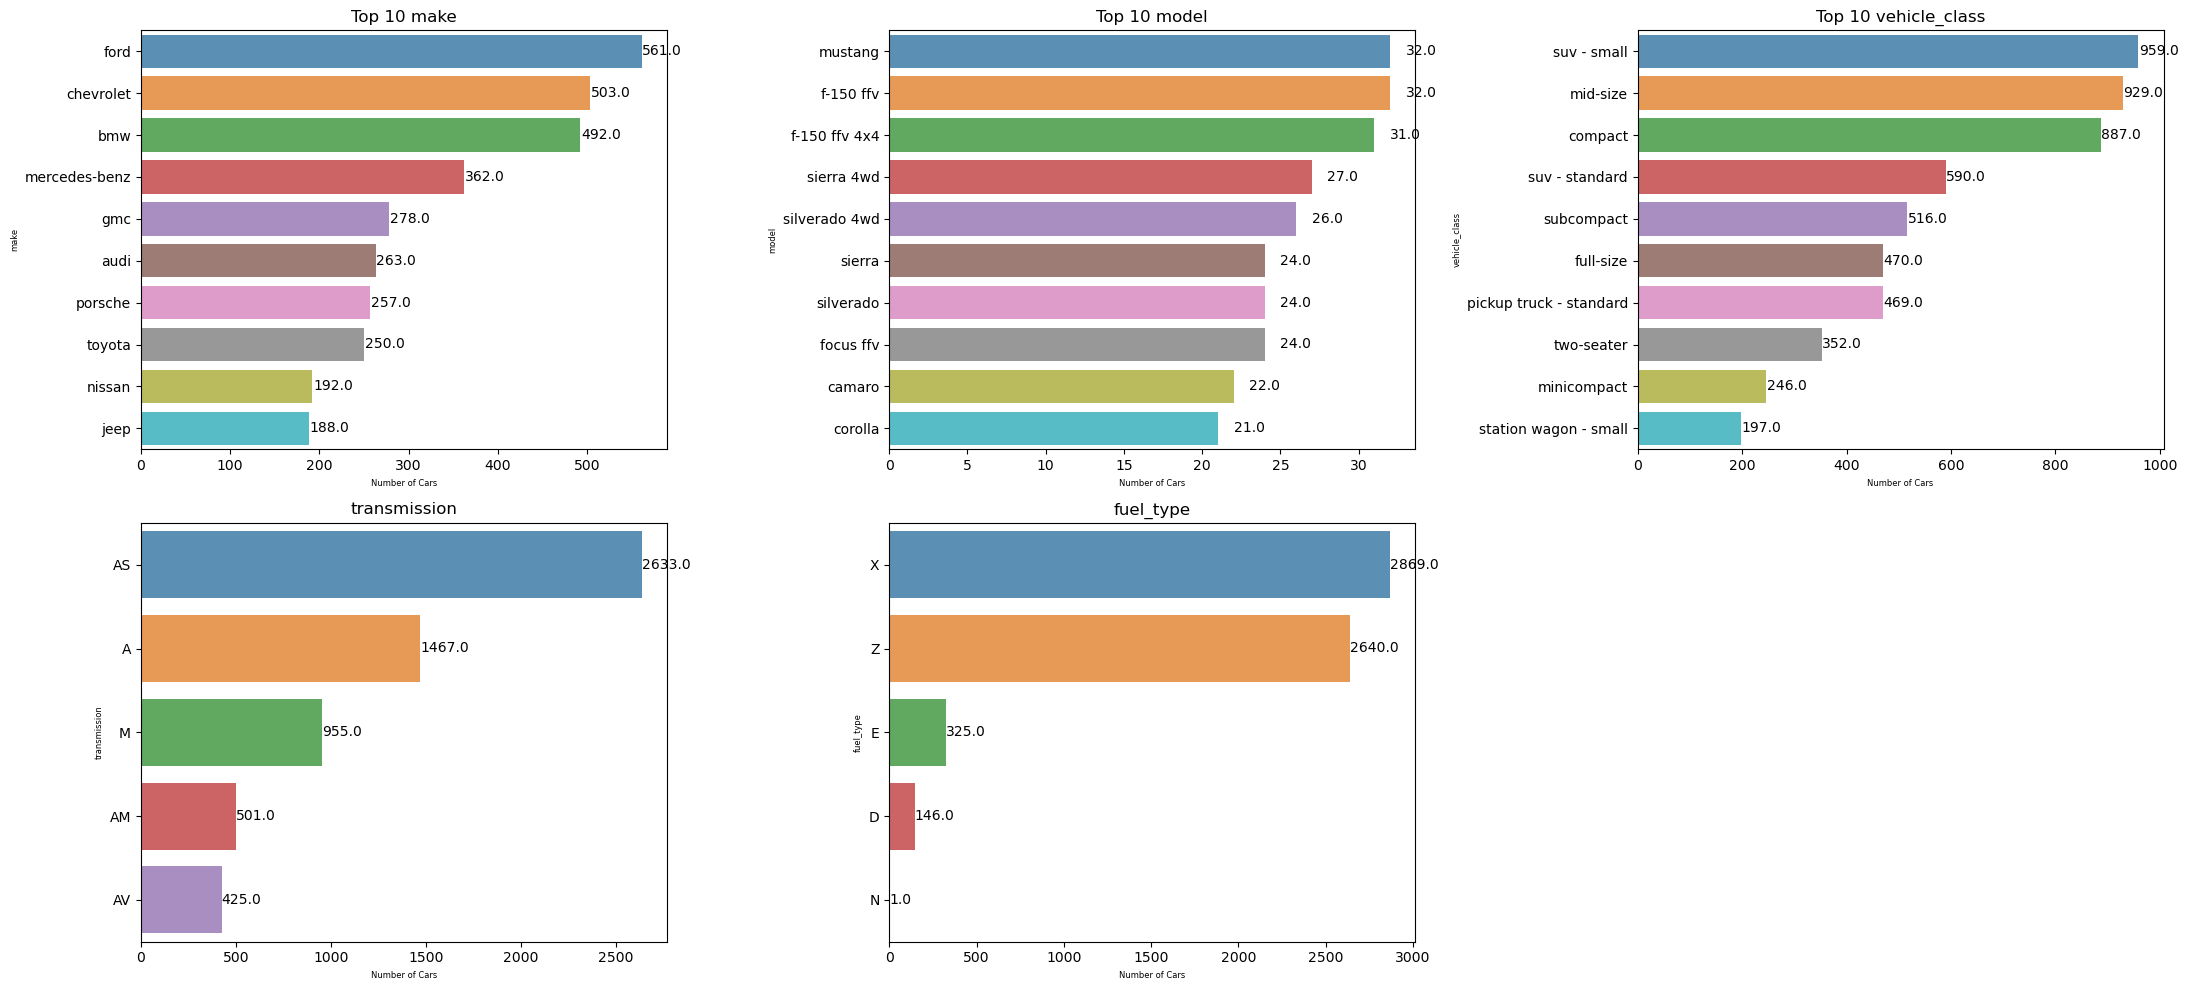

In [18]:
n_rows = 2
n_cols = 3

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(22, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through each categorical variable
for i, variable in enumerate(data_cat_features.columns):
    # Count the occurrences of each category
    cat_count = df[variable].value_counts()
    cat_count10 = cat_count.head(10)  # Get top 10 categories

    # Plot the bar chart
    ax = sns.barplot(x=cat_count10.values, y=cat_count10.index, alpha=0.8, ax=axes[i])

    # Annotate each bar with its count
    for p in ax.patches:
        ax.annotate(f'{p.get_width()}',
                    (p.get_width() + 1, p.get_y() + p.get_height() / 2),
                    ha='left', va='center')

    # Set title and labels
    axes[i].set_title('Top 10 {}'.format(variable) if len(cat_count) > 10 else variable)
    axes[i].set_xlabel('Number of Cars', fontsize=6)
    axes[i].set_ylabel(variable, fontsize=6)

# Remove the last subplot
fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()


In [19]:
#Univariative Analysis

In [20]:
fuel_type_counts = df['fuel_type'].value_counts()

# Show counts of make
make_counts = df['make'].value_counts()

# Show counts of transmission
transmission_counts = df['transmission'].value_counts()

vehicle_class_counts =df['vehicle_class'].value_counts()

model_counts =df['model'].value_counts()

# Display the counts
print("Counts of fuel_type:")
print(fuel_type_counts)
print("\nCounts of make:")
print(make_counts)
print("\nCounts of transmission:")
print(transmission_counts)
print("\nCounts of vehicle_class:")
print(vehicle_class_counts)
print("\nCounts of model")
print(model_counts)

Counts of fuel_type:
fuel_type
X    2869
Z    2640
E     325
D     146
N       1
Name: count, dtype: int64

Counts of make:
make
ford             561
chevrolet        503
bmw              492
mercedes-benz    362
gmc              278
audi             263
porsche          257
toyota           250
nissan           192
jeep             188
mini             187
kia              182
volkswagen       180
hyundai          172
dodge            151
cadillac         141
honda            139
lexus            129
mazda            125
volvo            118
subaru           112
jaguar           102
buick             91
infiniti          86
lincoln           78
land rover        73
ram               71
mitsubishi        71
chrysler          62
fiat              54
acura             49
maserati          49
rolls-royce       44
aston martin      39
lamborghini       37
bentley           35
scion             21
genesis           14
alfa romeo        13
smart              7
srt                2
bugatti   

In [21]:
num_cols = ['fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)', 'fuel_consumption_comb(mpg)']

In [22]:
quartiles_and_median = df[num_cols].describe().loc[['25%', '50%', '75%']]

print(quartiles_and_median)

     fuel_consumption_city  fuel_consumption_hwy  \
25%                   10.1                   7.5   
50%                   12.1                   8.7   
75%                   14.7                  10.3   

     fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  
25%                             8.9                        22.0  
50%                            10.6                        27.0  
75%                            12.7                        32.0  


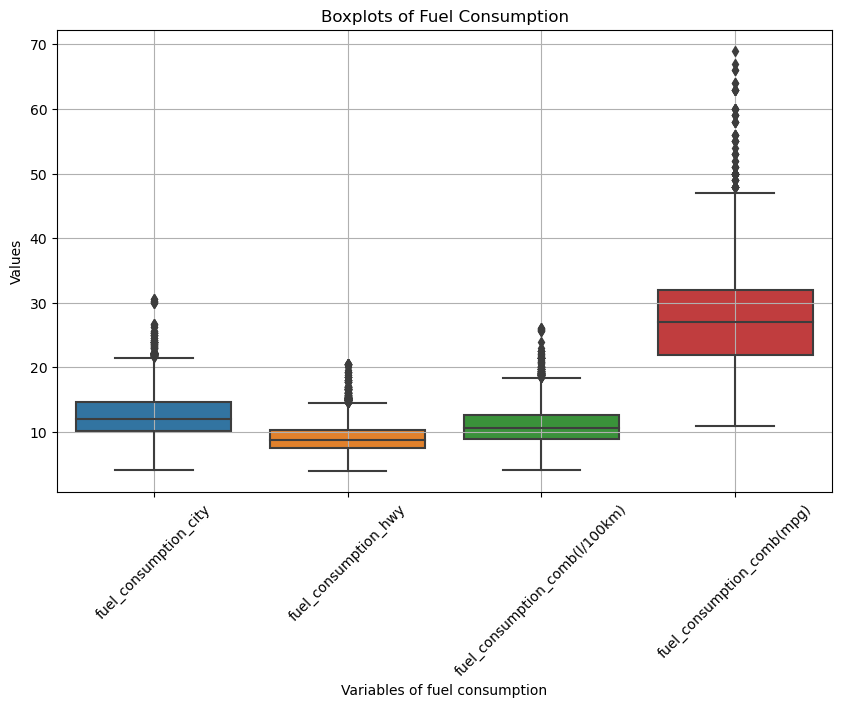

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols])
plt.xlabel('Variables of fuel consumption')
plt.ylabel('Values')
plt.title('Boxplots of Fuel Consumption')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
num_cols = ['fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)', 'fuel_consumption_comb(mpg)']

C:\Users\91866\AppData\Local\Temp\ipykernel_16820\3524617177.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], bins=20, kde=True, axlabel=f'{col} (20 bins)', ax=axes[i])
C:\Users\91866\AppData\Local\Temp\ipykernel_16820\3524617177.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

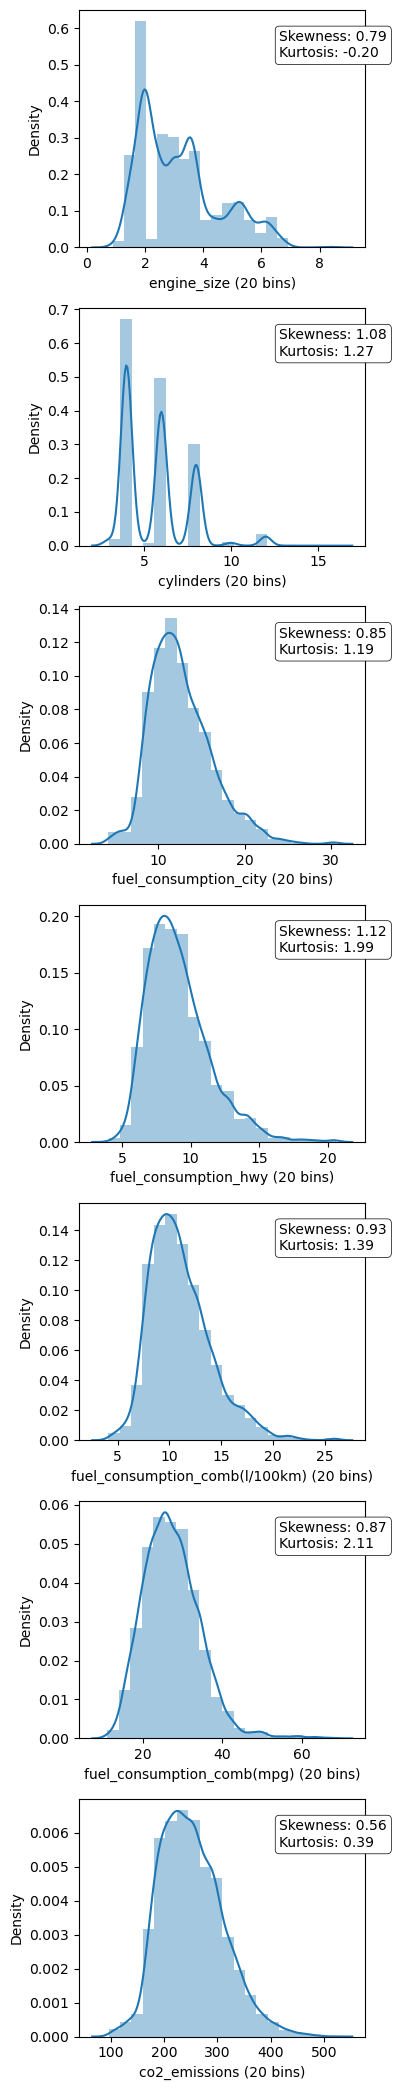

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis

# Select numerical columns
num_cols = df.select_dtypes(include=np.number).columns

# Create subplots
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(4, 3*len(num_cols)))

# Loop through each numerical column
for i, col in enumerate(num_cols):
    sns.distplot(df[col], bins=20, kde=True, axlabel=f'{col} (20 bins)', ax=axes[i])

    # Calculate skewness and kurtosis
    skewness = skew(df[col])
    kurt = kurtosis(df[col])

    # Annotate plot with skewness and kurtosis values
    axes[i].annotate(f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}',
                     xy=(0.7, 0.8), xycoords='axes fraction',
                     bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5))

plt.tight_layout()
plt.show()






Bivariative analysis

In [25]:
data_num_features = df.select_dtypes(include=np.number)

print('The numerical columns in the dataset are: ',data_num_features.columns)

The numerical columns in the dataset are:  Index(['engine_size', 'cylinders', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')


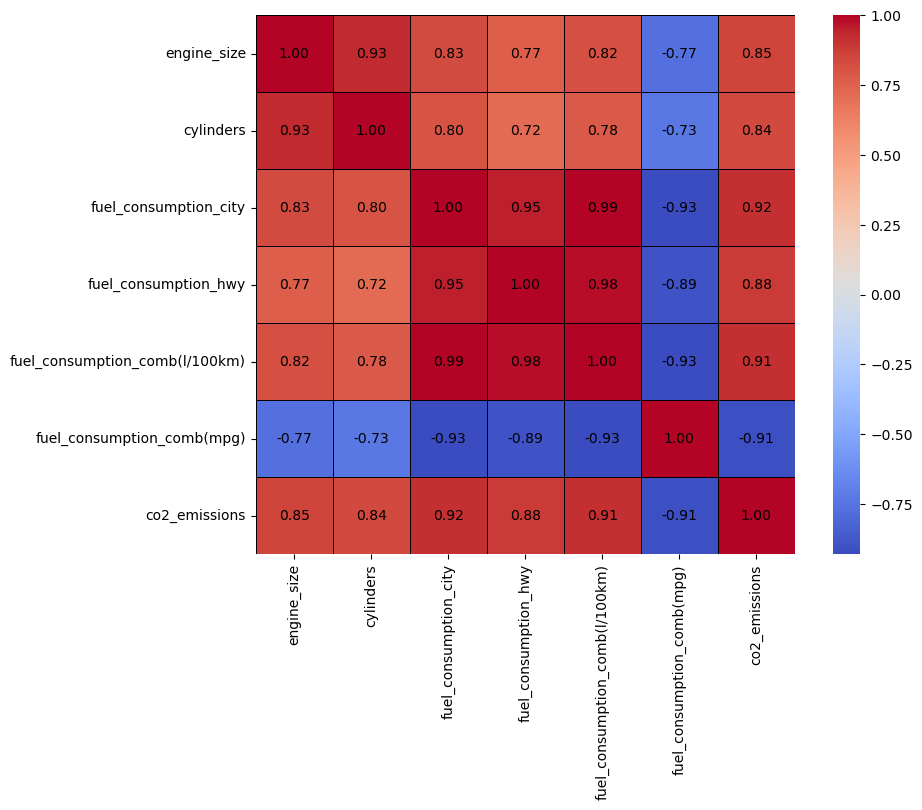

In [26]:
plt.figure(figsize=(10,7))
corr = data_num_features.corr(method='pearson')

# Plot heatmap
sns.heatmap(corr, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='black', annot=False, square=True)
for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j + 0.5, i + 0.5, '{:.2f}'.format(corr.iloc[i, j]), ha='center', va='center', color='black')

There is strong and positive correlation between co2_emissions

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['make2'] = label_encoder.fit_transform(df['make'])
df['vehicle_class2'] = label_encoder.fit_transform(df['vehicle_class'])
df['engine_size2'] = label_encoder.fit_transform(df['engine_size'])
df['cylinders2'] = label_encoder.fit_transform(df['cylinders'])
df['transmission2'] = label_encoder.fit_transform(df['transmission'])
df['fuel_type2'] = label_encoder.fit_transform(df['fuel_type'])

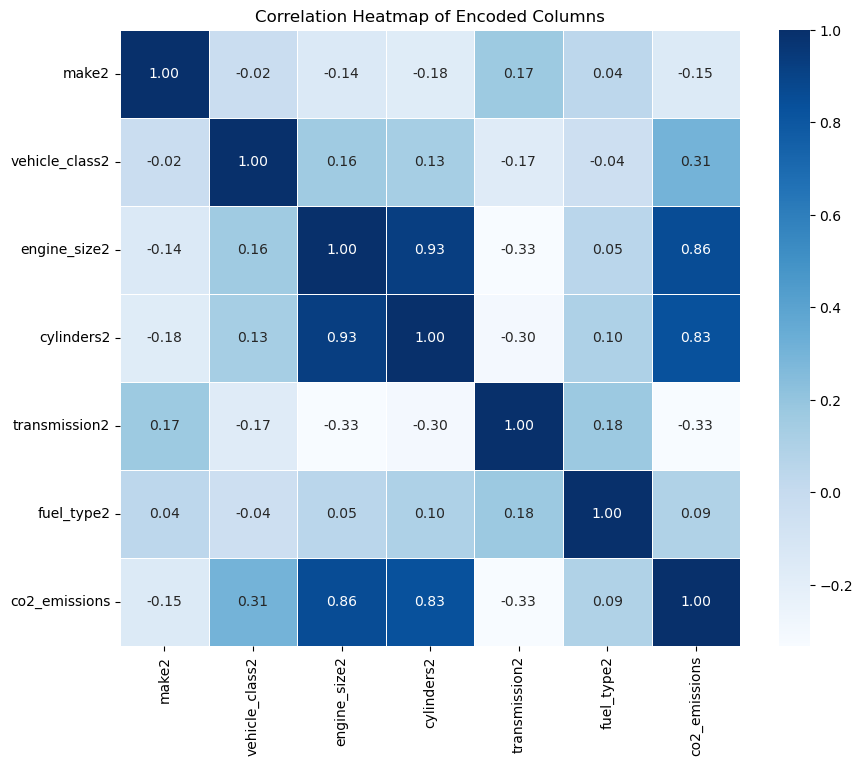

In [28]:
corr_matrix = df[['make2', 'vehicle_class2', 'engine_size2', 'cylinders2', 'transmission2', 'fuel_type2','co2_emissions']].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Heatmap of Encoded Columns')

# Show the plot
plt.show()


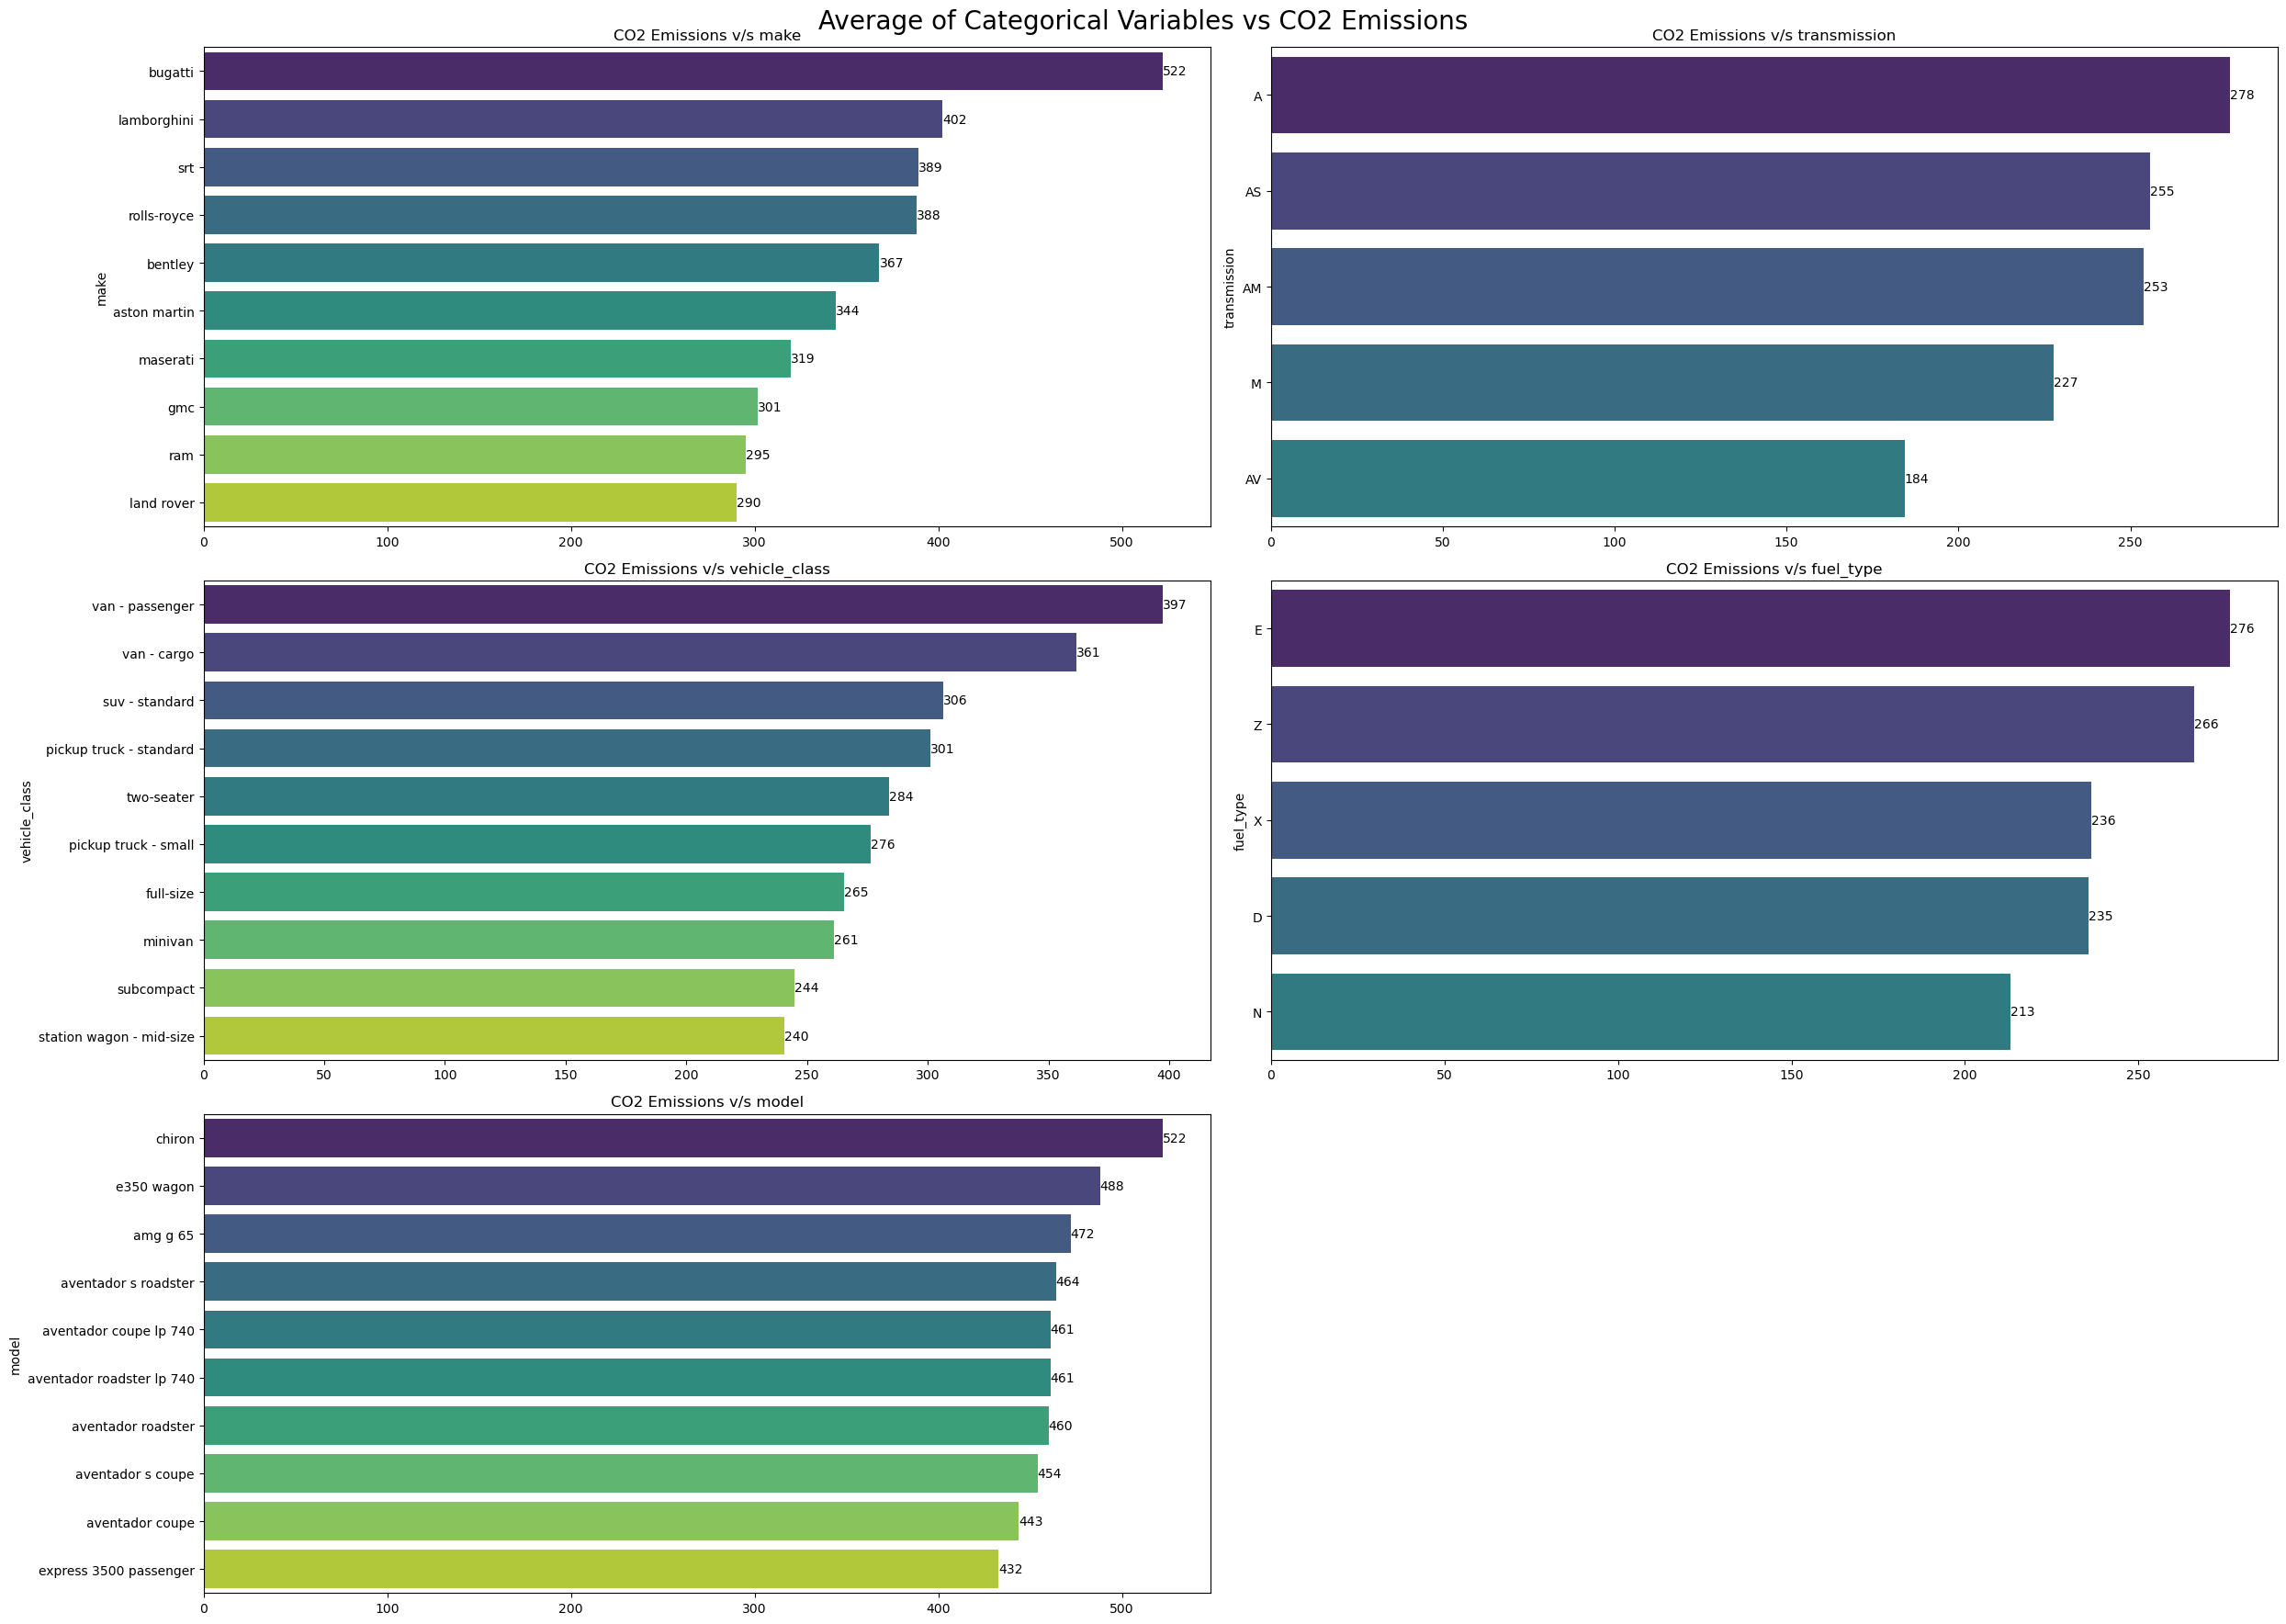

In [29]:
# Define categorical variables and their corresponding CO2 emissions averages
categorical_variables = ['make', 'transmission', 'vehicle_class', 'fuel_type', 'model']
co2_emissions_averages = [df.groupby(var)['co2_emissions'].mean().sort_values(ascending=False).head(10) if var != 'fuel_type'
                          else df.groupby(var)['co2_emissions'].mean().sort_values(ascending=False).head()
                          for var in categorical_variables]

# Define colors for bars
colors = sns.color_palette('viridis', n_colors=len(co2_emissions_averages[0]))

# Calculate the number of required subplots
num_plots = len(categorical_variables)
num_cols = 2
num_rows = num_plots // num_cols + (num_plots % num_cols > 0)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 6*num_rows))
fig.suptitle('Average of Categorical Variables vs CO2 Emissions', size=20)

# Plot barplots for each categorical variable
for i, (variable, co2_avg) in enumerate(zip(categorical_variables, co2_emissions_averages)):
    ax = axes[i // num_cols, i % num_cols]
    sns.barplot(x=co2_avg.values, y=co2_avg.index, ax=ax, palette=colors)
    ax.set_title('CO2 Emissions v/s {}'.format(variable))

    # Add values to the bars
    for j, value in enumerate(co2_avg.values):
        ax.text(value, j, f'{int(value):d}', ha='left', va='center', color='black', fontsize=10)

# Remove any unused subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


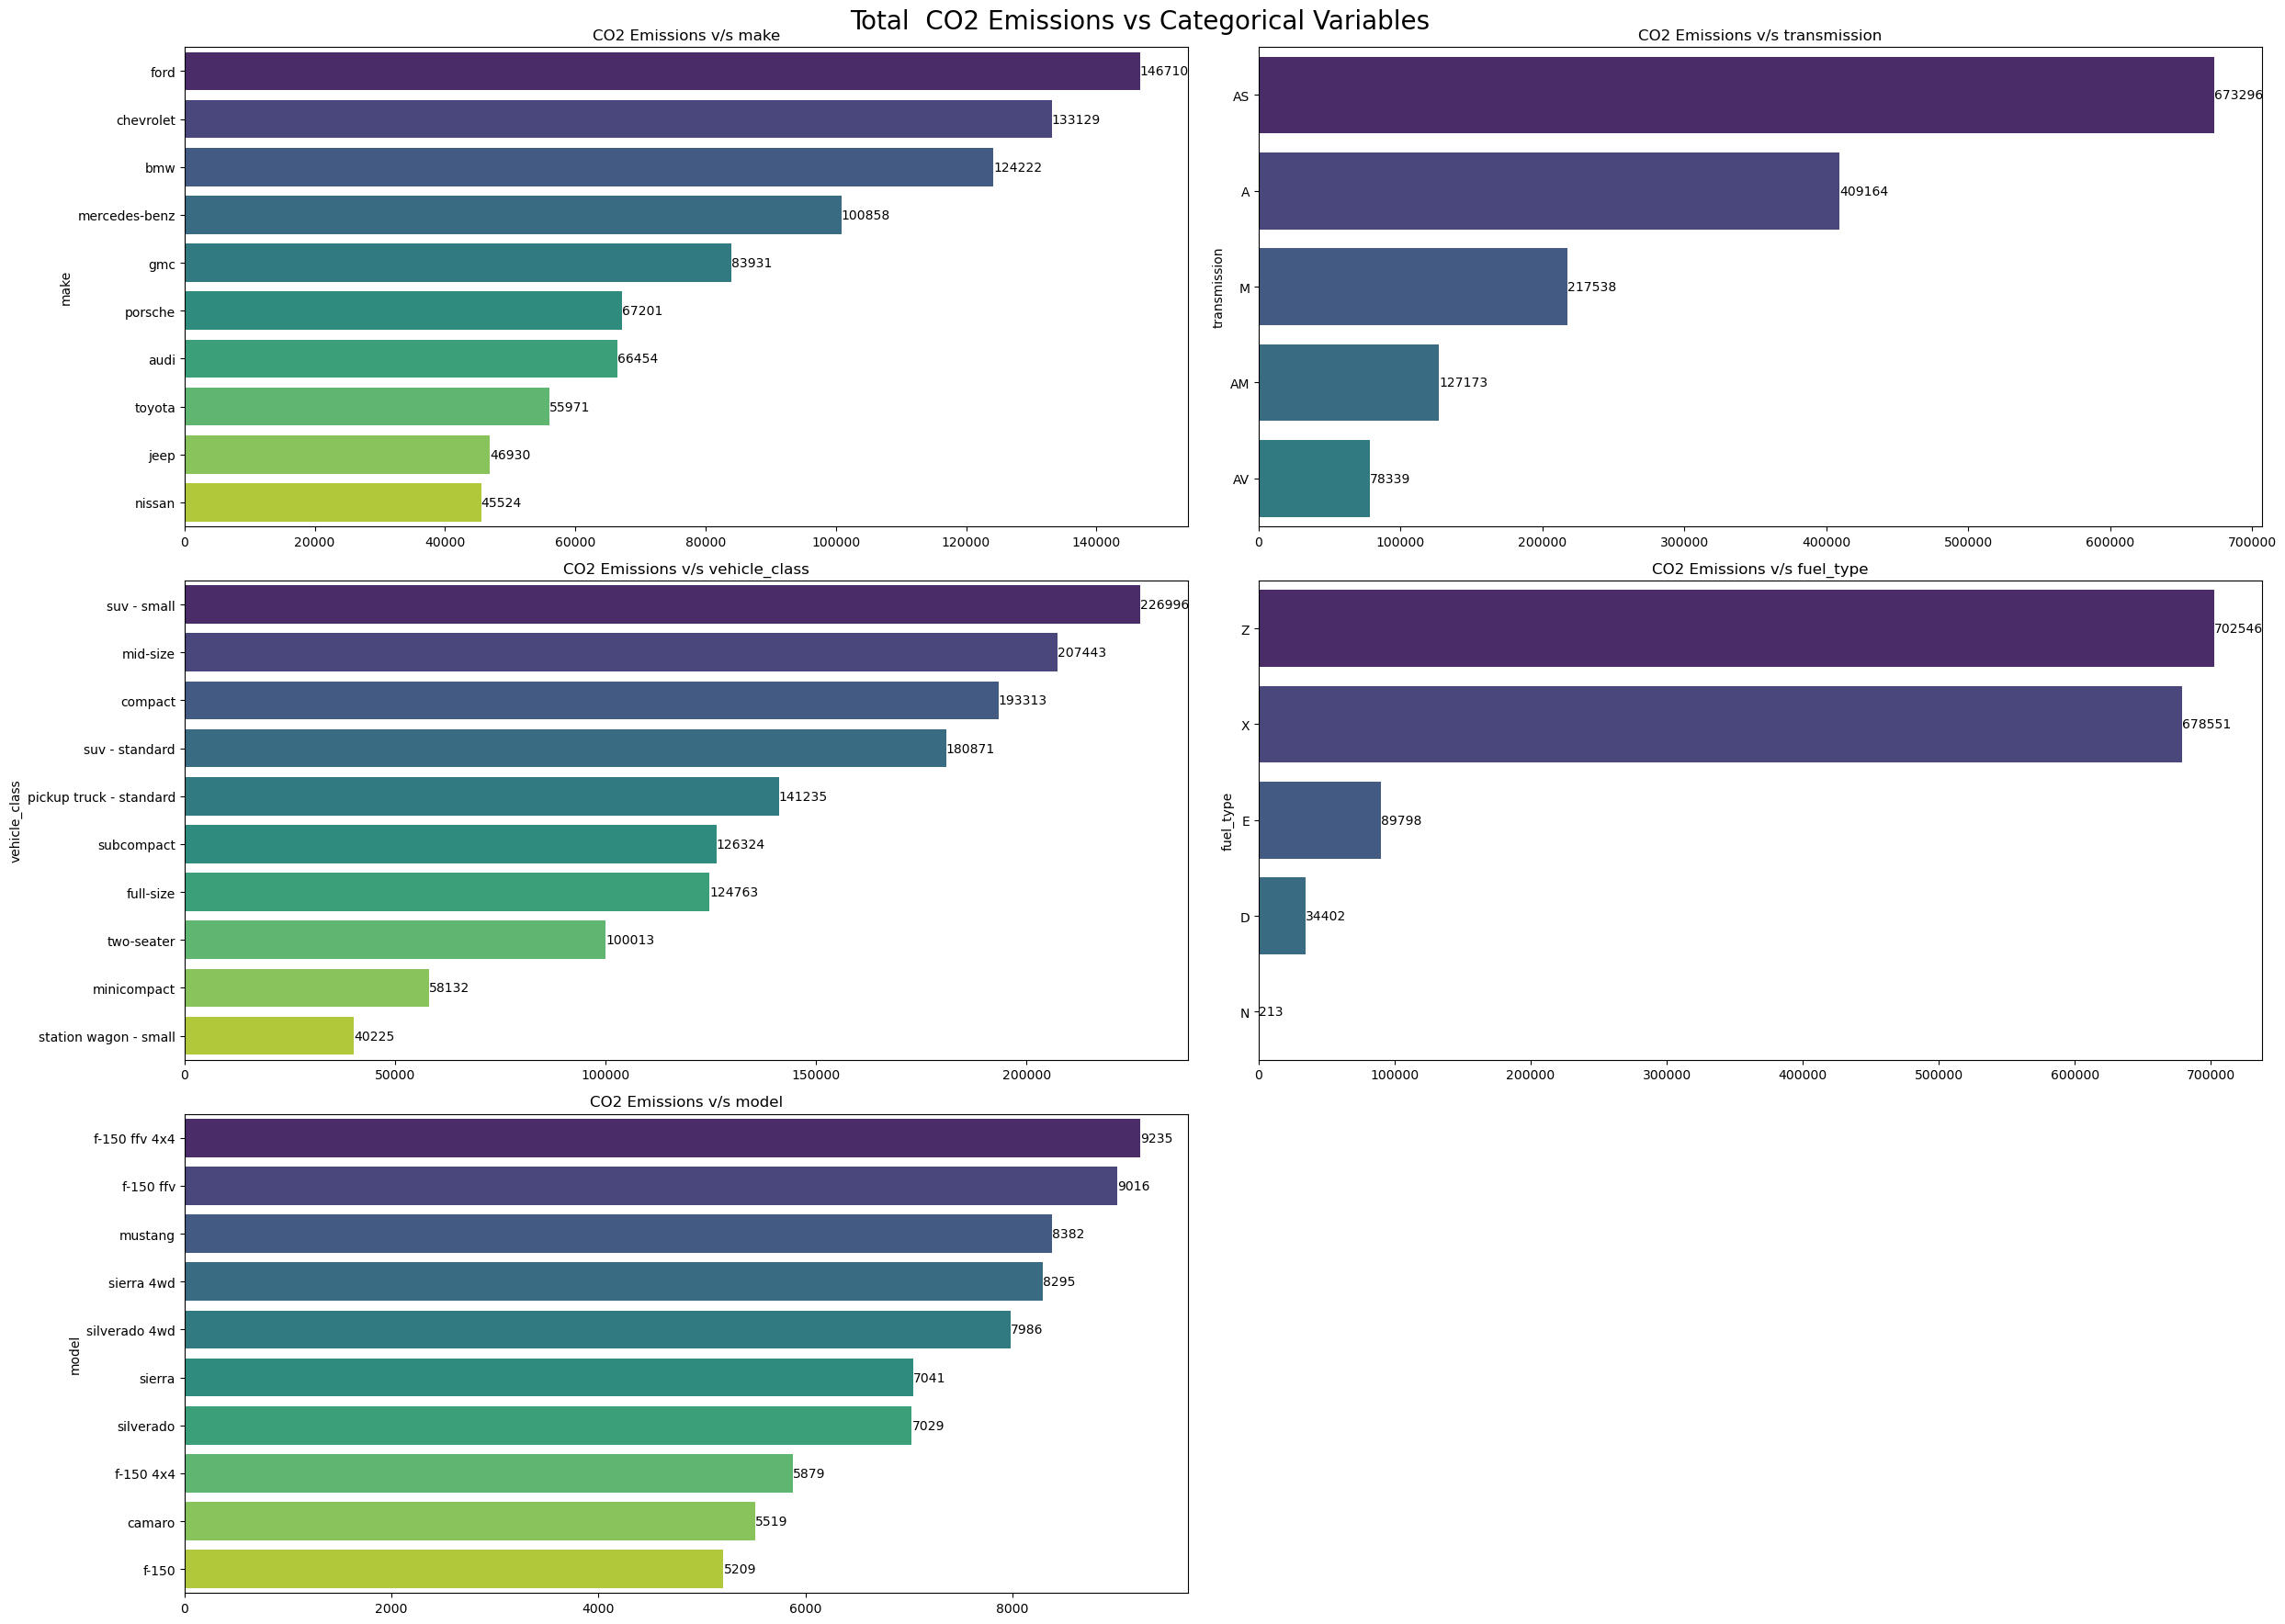

In [30]:
# Define categorical variables and their corresponding total CO2 emissions
categorical_variables = ['make', 'transmission', 'vehicle_class', 'fuel_type', 'model']
co2_emissions_total = [df.groupby(var)['co2_emissions'].sum().sort_values(ascending=False).head(10) if var != 'fuel_type'
                          else df.groupby(var)['co2_emissions'].sum().sort_values(ascending=False).head()
                          for var in categorical_variables]

# Define colors for bars
colors = sns.color_palette('viridis', n_colors=len(co2_emissions_averages[0]))

# Calculate the number of required subplots
num_plots = len(categorical_variables)
num_cols = 2
num_rows = num_plots // num_cols + (num_plots % num_cols > 0)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 6*num_rows))
fig.suptitle('Total  CO2 Emissions vs Categorical Variables ', size=20)

# Plot barplots for each categorical variable
for i, (variable, co2_avg) in enumerate(zip(categorical_variables, co2_emissions_total)):
    ax = axes[i // num_cols, i % num_cols]
    sns.barplot(x=co2_avg.values, y=co2_avg.index, ax=ax, palette=colors)
    ax.set_title('CO2 Emissions v/s {}'.format(variable))

    # Add values to the bars
    for j, value in enumerate(co2_avg.values):
        ax.text(value, j, f'{int(value):d}', ha='left', va='center', color='black', fontsize=10)

# Remove any unused subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


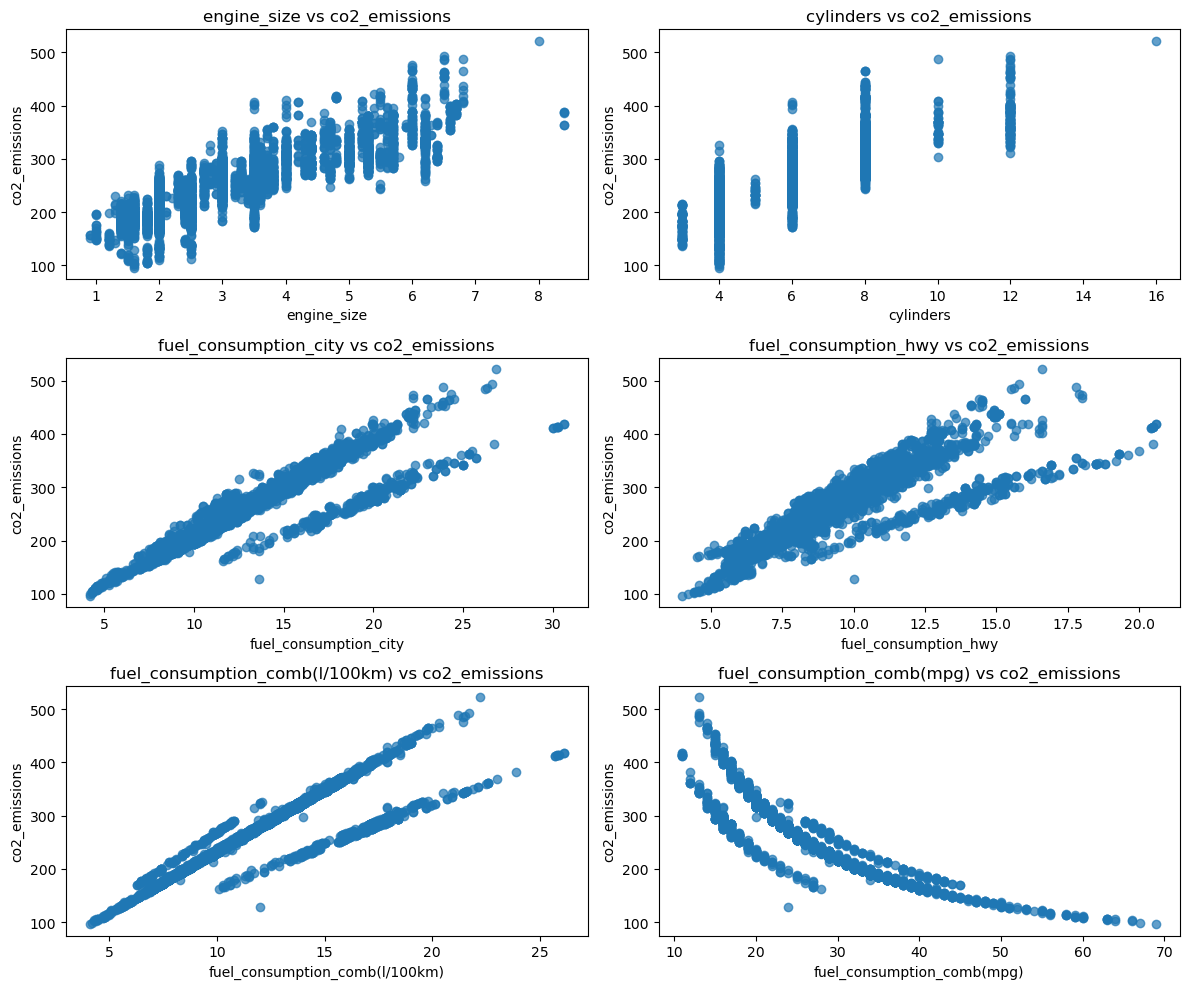

In [31]:
columns = ["engine_size","cylinders","fuel_consumption_city","fuel_consumption_hwy","fuel_consumption_comb(l/100km)","fuel_consumption_comb(mpg)"]

# Create a (3,2) subplot layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Flatten the axes array to loop through all subplots
axes = axes.flatten()
# Loop through each column and plot against 'co2_emissions'
for i, column in enumerate(columns):
    axes[i].scatter(df[column], df['co2_emissions'], alpha=0.7)
    axes[i].set_title(f'{column} vs co2_emissions')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('co2_emissions')

# Remove any unused subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

More the miles the less is the co2 emmisions
Higher the fuel consumption more co2 emmisions are produced.
Bigger engines have more cylinders and produce more co2 emisions

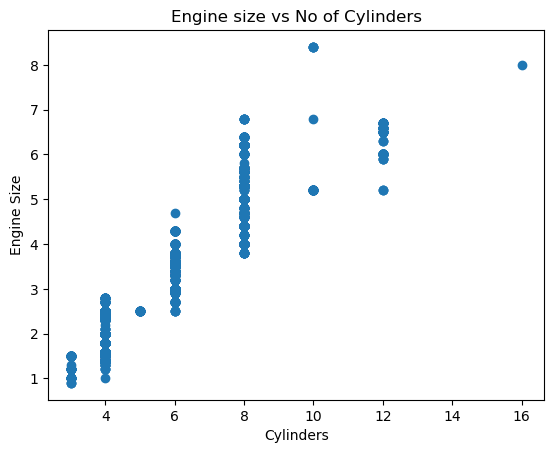

In [32]:
plt.scatter(df['cylinders'],df['engine_size'])
plt.ylabel('Engine Size')
plt.xlabel('Cylinders')
plt.title('Engine size vs No of Cylinders')
plt.show()

More the Engine size there will more no of cylinders

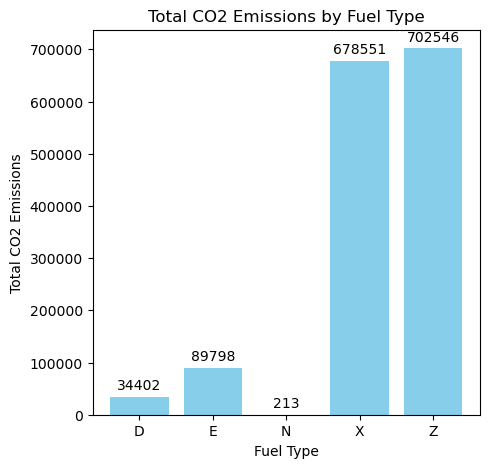

In [33]:
total_emissions = df.groupby('fuel_type')['co2_emissions'].sum().reset_index()

# Plotting
plt.figure(figsize=(5, 5))
bars = plt.bar(total_emissions['fuel_type'], total_emissions['co2_emissions'], color='skyblue')

# Adding total co2 emission values on top of the bars using annotate method
for bar in bars:
    yval = bar.get_height()
    plt.annotate(f"{yval}",
                 xy=(bar.get_x() + bar.get_width() / 2, yval),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xlabel('Fuel Type')
plt.ylabel('Total CO2 Emissions')
plt.title('Total CO2 Emissions by Fuel Type')
plt.show()

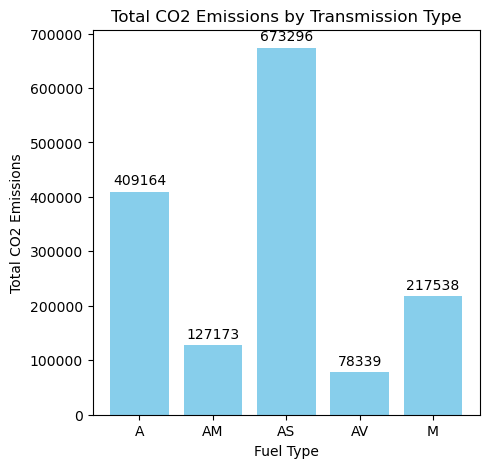

In [34]:
total_emissions = df.groupby('transmission')['co2_emissions'].sum().reset_index()

# Plotting
plt.figure(figsize=(5, 5))
bars = plt.bar(total_emissions['transmission'], total_emissions['co2_emissions'], color='skyblue')

# Adding total co2 emission values on top of the bars using annotate method
for bar in bars:
    yval = bar.get_height()
    plt.annotate(f"{yval}",
                 xy=(bar.get_x() + bar.get_width() / 2, yval),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xlabel('Fuel Type')
plt.ylabel('Total CO2 Emissions')
plt.title('Total CO2 Emissions by Transmission Type')
plt.show()

In [35]:
df.rename(index={'X': 'Regular gasoline', 'Z': 'Premium gasoline', 'D': 'Diesel', 'E': 'Ethanol (E85)', 'N': 'Natural gas'}, inplace=True)

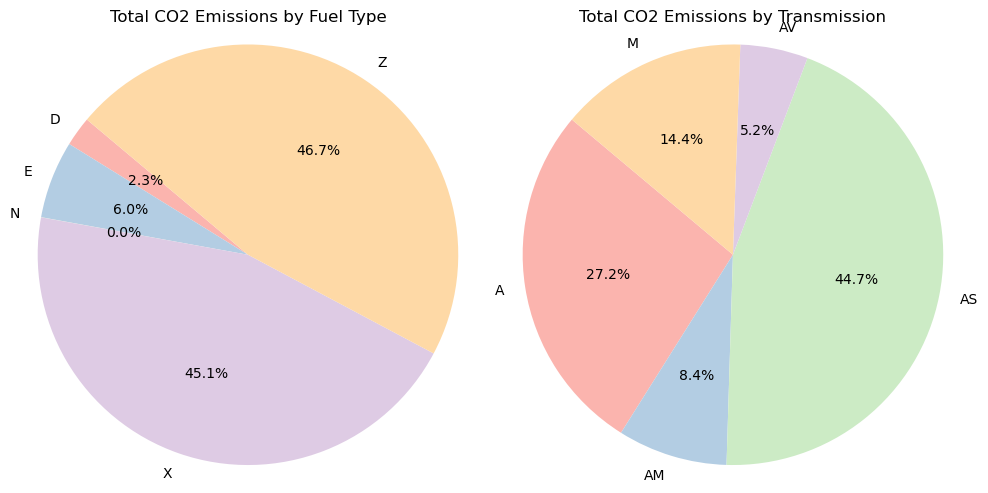

In [36]:
# Calculate total CO2 emissions by fuel type
total_emissions_fuel = df.groupby('fuel_type')['co2_emissions'].sum().reset_index()

# Calculate total CO2 emissions by transmission
total_emissions_transmission = df.groupby('transmission')['co2_emissions'].sum().reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart for total CO2 emissions by fuel type
axes[0].pie(total_emissions_fuel['co2_emissions'], labels=total_emissions_fuel['fuel_type'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Pastel1'))
axes[0].set_title('Total CO2 Emissions by Fuel Type')

# Pie chart for total CO2 emissions by transmission
axes[1].pie(total_emissions_transmission['co2_emissions'], labels=total_emissions_transmission['transmission'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Pastel1'))
axes[1].set_title('Total CO2 Emissions by Transmission')

# Equal aspect ratio ensures that pies are drawn as circles
for ax in axes:
    ax.axis('equal')

plt.tight_layout()
plt.show()

In [37]:
#Fuel X and Z produces the most CO2 emissions as these fuels are used by most of the vehicles in the data

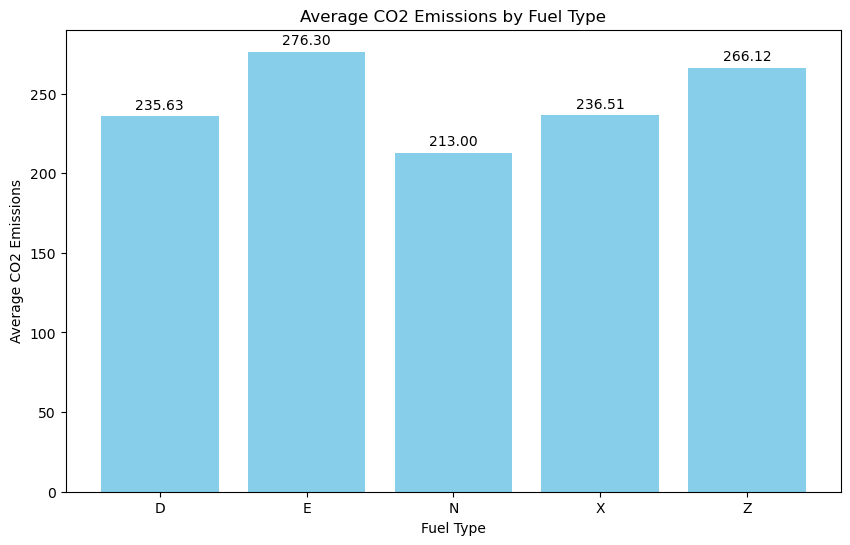

In [38]:
average_emissions = df.groupby('fuel_type')['co2_emissions'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(average_emissions['fuel_type'], average_emissions['co2_emissions'], color='skyblue')

# Adding average co2 emission values on top of the bars using annotate method
for bar in bars:
    yval = bar.get_height()
    plt.annotate(f"{yval:.2f}",
                 xy=(bar.get_x() + bar.get_width() / 2, yval),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xlabel('Fuel Type')
plt.ylabel('Average CO2 Emissions')
plt.title('Average CO2 Emissions by Fuel Type')
plt.show()

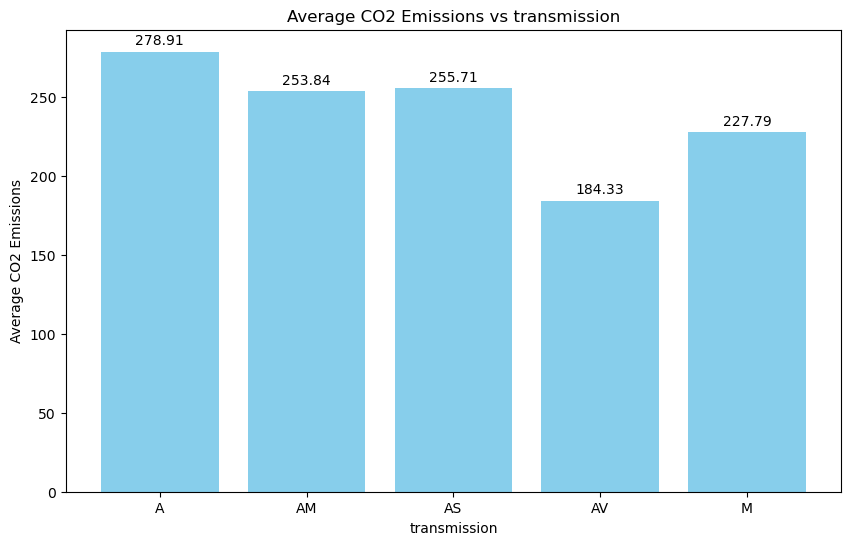

In [39]:
average_emissions = df.groupby('transmission')['co2_emissions'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(average_emissions['transmission'], average_emissions['co2_emissions'], color='skyblue')

# Adding average co2 emission values on top of the bars using annotate method
for bar in bars:
    yval = bar.get_height()
    plt.annotate(f"{yval:.2f}",
                 xy=(bar.get_x() + bar.get_width() / 2, yval),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xlabel('transmission')
plt.ylabel('Average CO2 Emissions')
plt.title('Average CO2 Emissions vs transmission')
plt.show()

In [40]:
#A-Automatic Transmission is having the highest Average CO2 emission
#AV-Continuously variable transmission is having the lowest Average CO2 emission

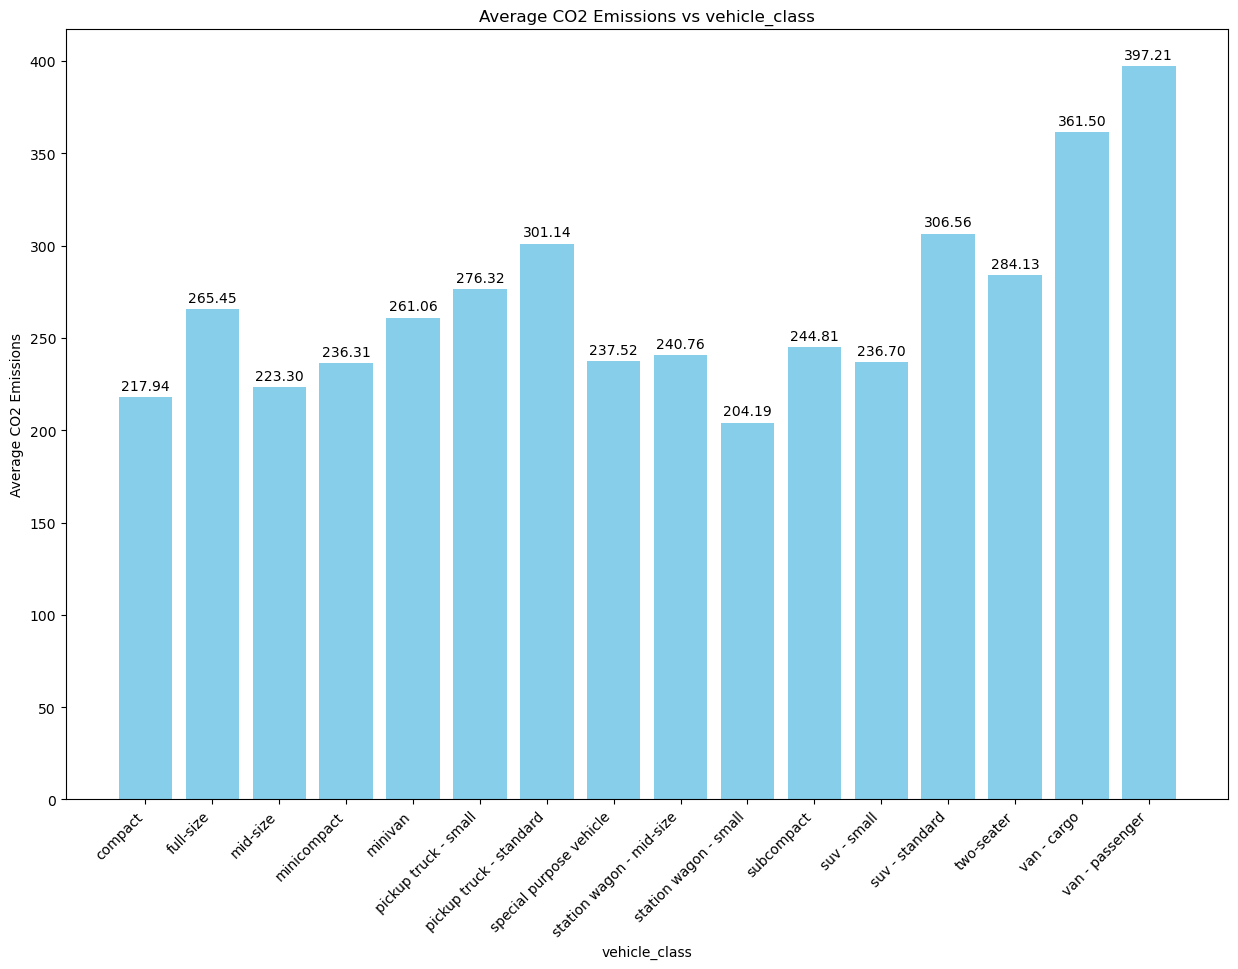

In [41]:
average_emissions = df.groupby('vehicle_class')['co2_emissions'].mean().reset_index()

# Plotting
plt.figure(figsize=(15, 10))
bars = plt.bar(average_emissions['vehicle_class'], average_emissions['co2_emissions'], color='skyblue')

# Adding average co2 emission values on top of the bars using annotate method
for bar in bars:
    yval = bar.get_height()
    plt.annotate(f"{yval:.2f}",
                 xy=(bar.get_x() + bar.get_width() / 2, yval),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xlabel('vehicle_class')
plt.ylabel('Average CO2 Emissions')
plt.title('Average CO2 Emissions vs vehicle_class')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()

Text(0.5, 1.0, 'Scatter Plot of Fuel Consumption vs CO2 Emissions')

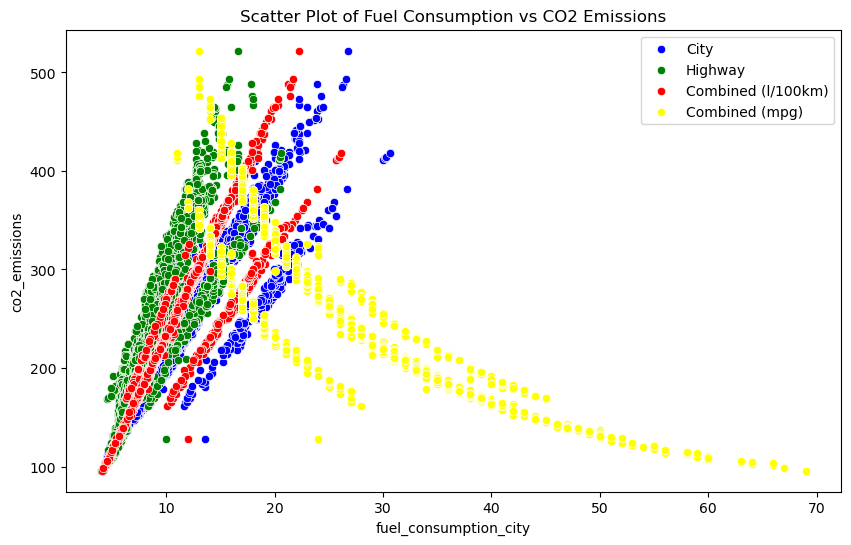

In [42]:
x_vars = ['fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)', 'fuel_consumption_comb(mpg)']
y_var = 'co2_emissions'
colors = ['blue', 'green', 'red', 'yellow']
labels = ['City', 'Highway', 'Combined (l/100km)', 'Combined (mpg)']

plt.figure(figsize=(10, 6))
for x_var, color, label in zip(x_vars, colors, labels):
    sns.scatterplot(data=df, x=df[x_var], y=df[y_var], color=color, label=label)


plt.title('Scatter Plot of Fuel Consumption vs CO2 Emissions')